In [11]:
import cv2
import numpy as np,sys
import matplotlib.pyplot as plt
import os
n = 10
curpath = os.getcwd()
#print(curpath)
img_path1 = f'{curpath}//input4//maxresdefault.jpg'
img_path2 = f'{curpath}//input4//maxresdefault1.jpg'
img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)
#print(img1)
#print(img2)
img2 = np.resize(img2, img1.shape)
showedimg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
axes.imshow(showedimg1)


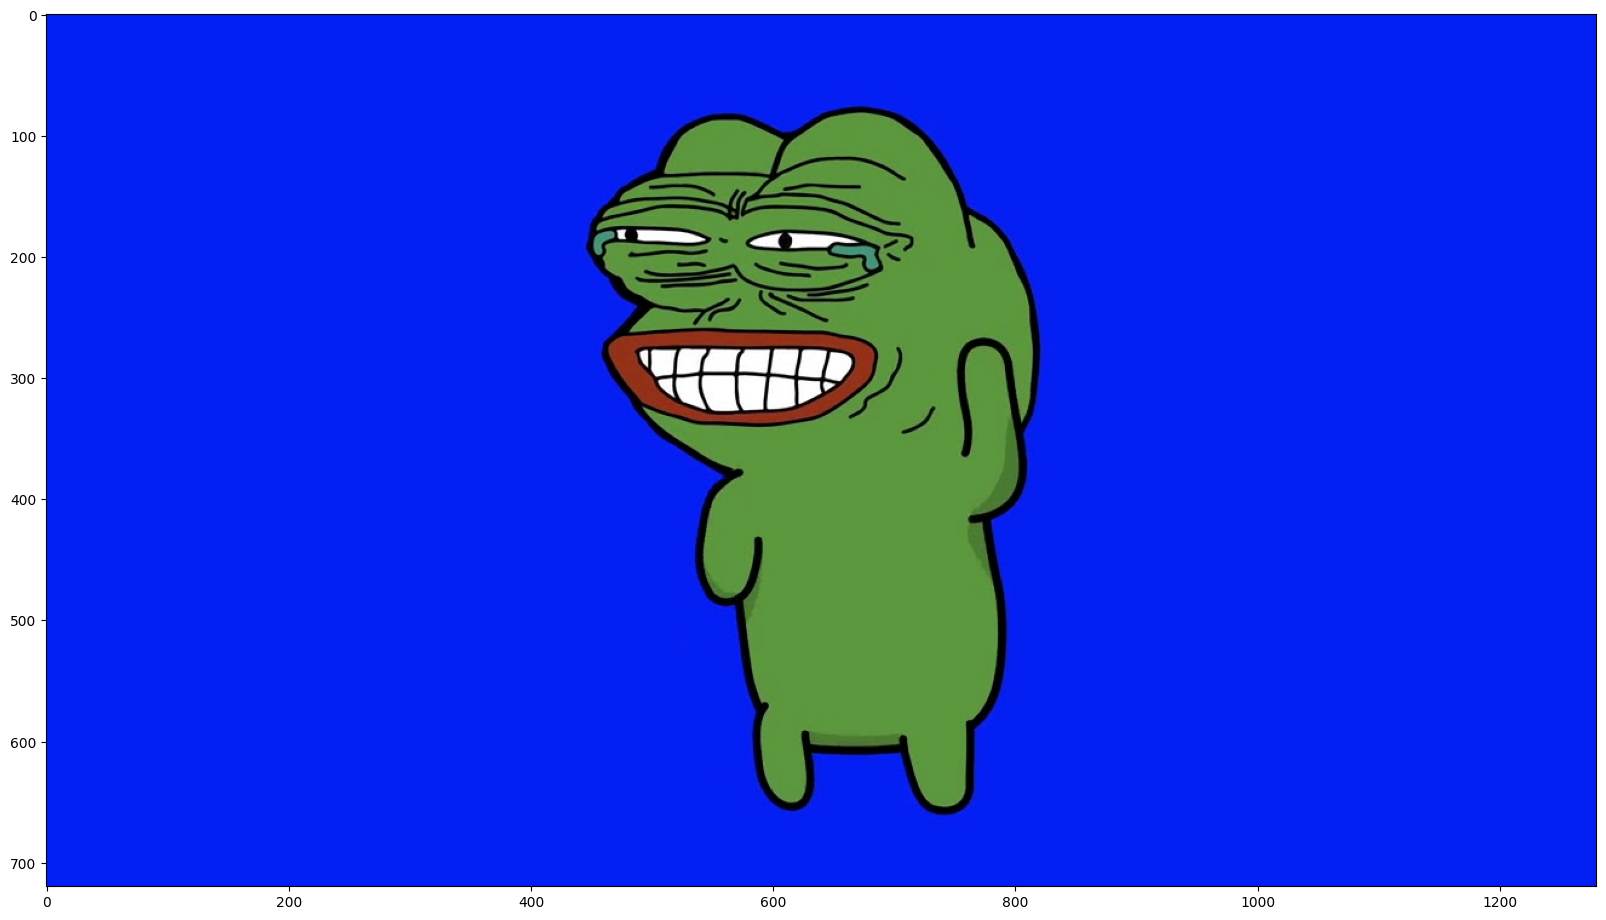

In [12]:
showedimg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
_, axes = plt.subplots(figsize=(20,20))
axes.imshow(showedimg2)

In [13]:
gaus1 = [img1]
for i in range(n):
    gaus1.append(cv2.pyrDown(gaus1[i]))
gaus2 = [img2]
for i in range(n):
    gaus2.append(cv2.pyrDown(gaus2[i]))

In [14]:
lapl1 = [gaus1[n-1]]
for i in range(n-1, 0, -1):
    t = cv2.pyrUp(gaus1[i])
    if(np.prod(t.shape) < np.prod(gaus1[i-1].shape)):
        gaus1[i-1] = np.resize(gaus1[i-1], t.shape)
    else:
        t = np.resize(t, gaus1[i-1].shape)
    lapl1.append(cv2.subtract(gaus1[i-1], t))

In [15]:
lapl2 = [gaus2[n-1]]
for i in range(n-1, 0, -1):
    t = cv2.pyrUp(gaus2[i])
    if(np.prod(t.shape) < np.prod(gaus2[i-1].shape)):
        gaus2[i-1] = np.resize(gaus2[i-1], t.shape)
    else:
        t = np.resize(t, gaus2[i-1].shape)
    lapl2.append(cv2.subtract(gaus2[i-1], t))

In [16]:
LS = []
for la,lb in zip(lapl1, lapl2):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

In [17]:
ls_ = LS[0]
for i in range(1,n):
    ls_ = cv2.pyrUp(ls_)
    if(np.prod(ls_.shape) < np.prod(LS[i].shape)):
        LS[i] = np.resize(LS[i], ls_.shape)
    else:
        ls_ = np.resize(ls_, LS[i].shape)
    ls_ = cv2.add(ls_, LS[i])

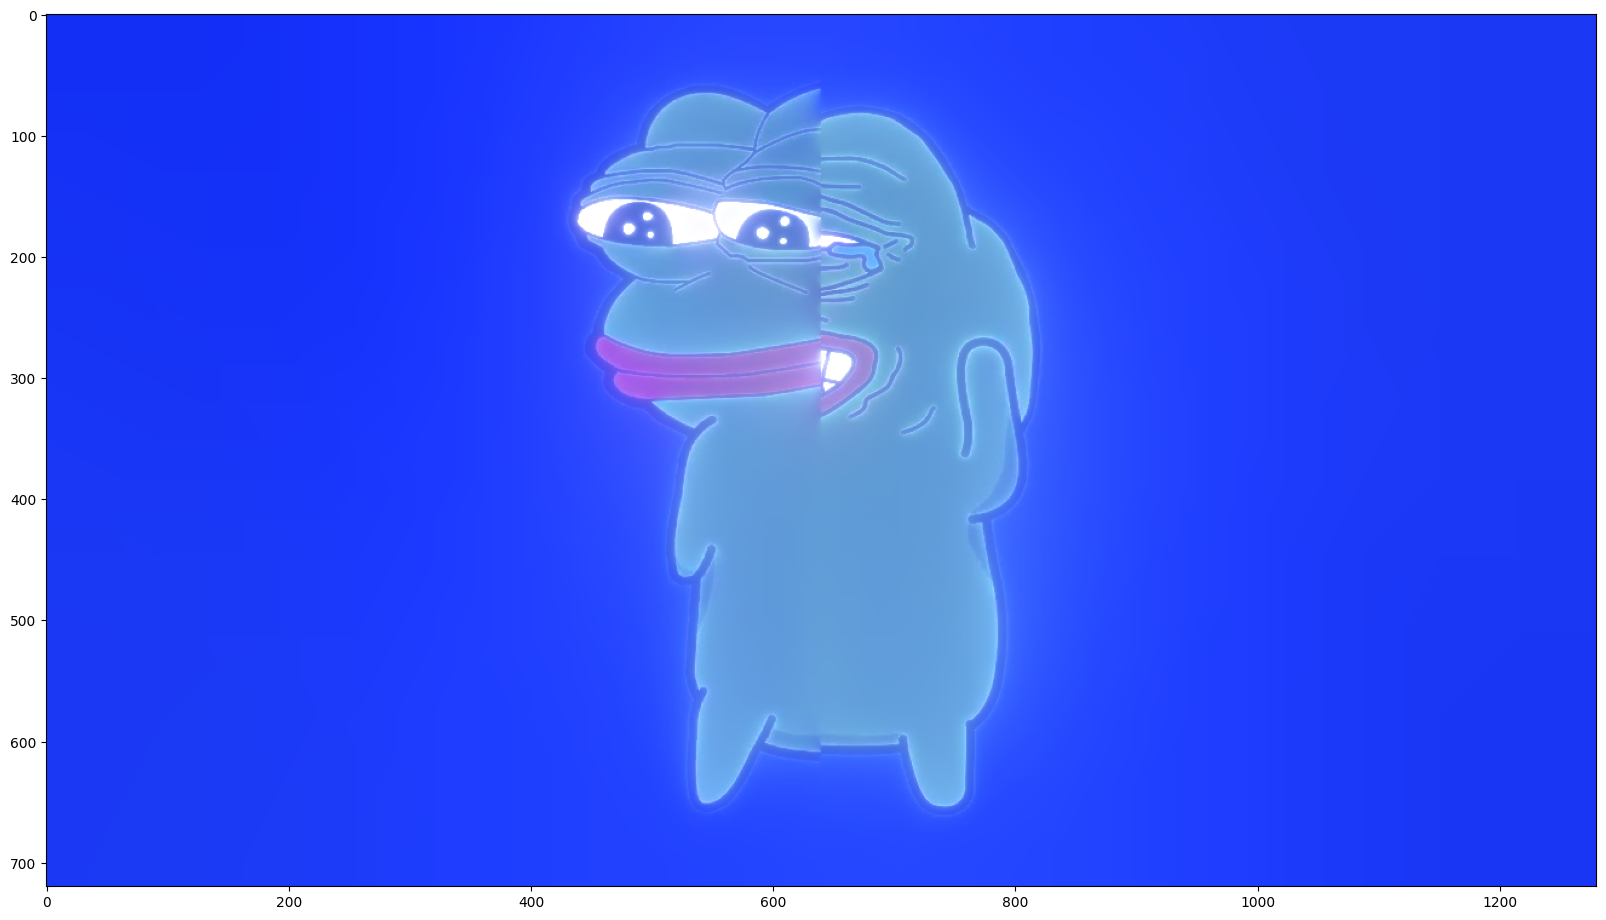

In [18]:
showedimg3 = cv2.cvtColor(ls_, cv2.COLOR_BGR2RGB)
_, axes = plt.subplots(figsize=(20,20))
axes.imshow(showedimg3)